<a href="https://colab.research.google.com/github/FaGu2109/LABORATORIO-No.-13/blob/main/LABORATORIO_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LABORATORIO No.4
PRESENTADO POR: FABIO GUTIERREZ
INTELIGENCIA ARTIFICIAL

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Tamaño del conjunto de entrenamiento: (60000, 28, 28)
Tamaño del conjunto de prueba: (10000, 28, 28)


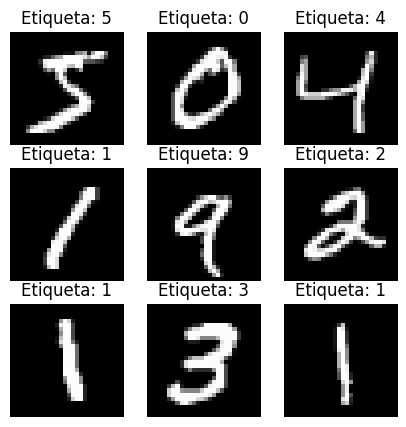

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Entrenando el modelo, por favor espera unos segundos...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8786 - loss: 0.4295 - val_accuracy: 0.9601 - val_loss: 0.1313
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9637 - loss: 0.1247 - val_accuracy: 0.9692 - val_loss: 0.0985
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9754 - loss: 0.0808 - val_accuracy: 0.9736 - val_loss: 0.0821
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9829 - loss: 0.0580 - val_accuracy: 0.9764 - val_loss: 0.0782
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9866 - loss: 0.0440 - val_accuracy: 0.9767 - val_loss: 0.0724
313/313 - 1s - 3ms/step - accuracy: 0.9767 - loss: 0.0724

✅ Precisión en el conjunto de prueba: 0.98
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


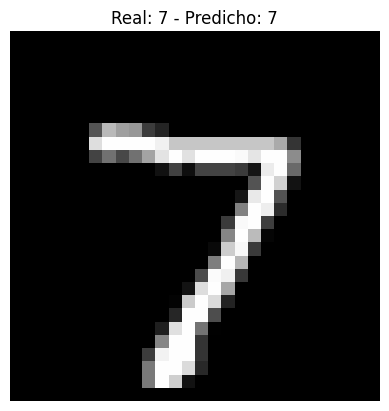

In [1]:
# ============================================================
# 🧠 APRENDIZAJE SUPERVISADO CON IMÁGENES (EJEMPLO FÁCIL)
# Reconocimiento de dígitos escritos a mano con MNIST
# ============================================================

# 1️⃣ Importar librerías necesarias
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

# 2️⃣ Cargar el dataset de imágenes (MNIST)
# Contiene 60,000 imágenes de entrenamiento y 10,000 de prueba
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print("Tamaño del conjunto de entrenamiento:", x_train.shape)
print("Tamaño del conjunto de prueba:", x_test.shape)

# 3️⃣ Visualizar algunas imágenes de ejemplo
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Etiqueta: {y_train[i]}")
    plt.axis('off')
plt.show()

# 4️⃣ Normalizar los datos (valores entre 0 y 1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# 5️⃣ Crear el modelo (red neuronal simple)
modelo = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),      # Convierte imagen 28x28 en vector 784
    layers.Dense(128, activation='relu'),      # Capa oculta con 128 neuronas
    layers.Dense(10, activation='softmax')     # 10 salidas (una por cada dígito)
])

# 6️⃣ Compilar el modelo (definir cómo aprende)
modelo.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 7️⃣ Entrenar el modelo
print("Entrenando el modelo, por favor espera unos segundos...")
historial = modelo.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# 8️⃣ Evaluar el modelo
test_loss, test_acc = modelo.evaluate(x_test, y_test, verbose=2)
print(f"\n✅ Precisión en el conjunto de prueba: {test_acc:.2f}")

# 9️⃣ Probar con una imagen individual
import numpy as np

indice = 0  # puedes cambiar el número
imagen = x_test[indice]
etiqueta_real = y_test[indice]

prediccion = modelo.predict(imagen.reshape(1, 28, 28))
numero_predicho = np.argmax(prediccion)

plt.imshow(imagen, cmap='gray')
plt.title(f"Real: {etiqueta_real} - Predicho: {numero_predicho}")
plt.axis('off')
plt.show()


PARTE 2

Tamaño de las imágenes: (5000, 28, 28)

🔹 Entrenando modelo K-Means...
✅ Modelo entrenado. Se formaron 10 grupos.


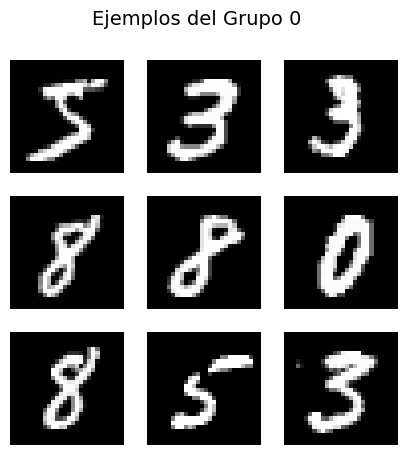

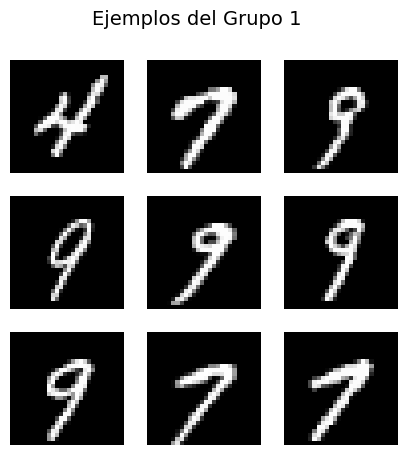

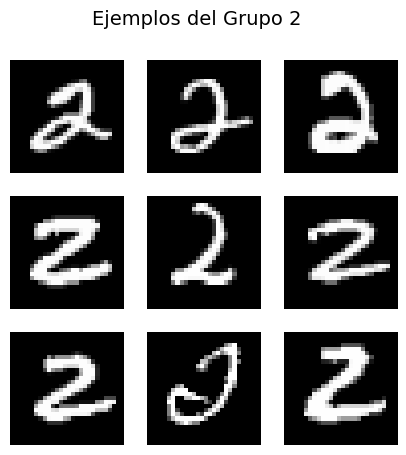


🔹 Aplicando PCA para reducir dimensiones...


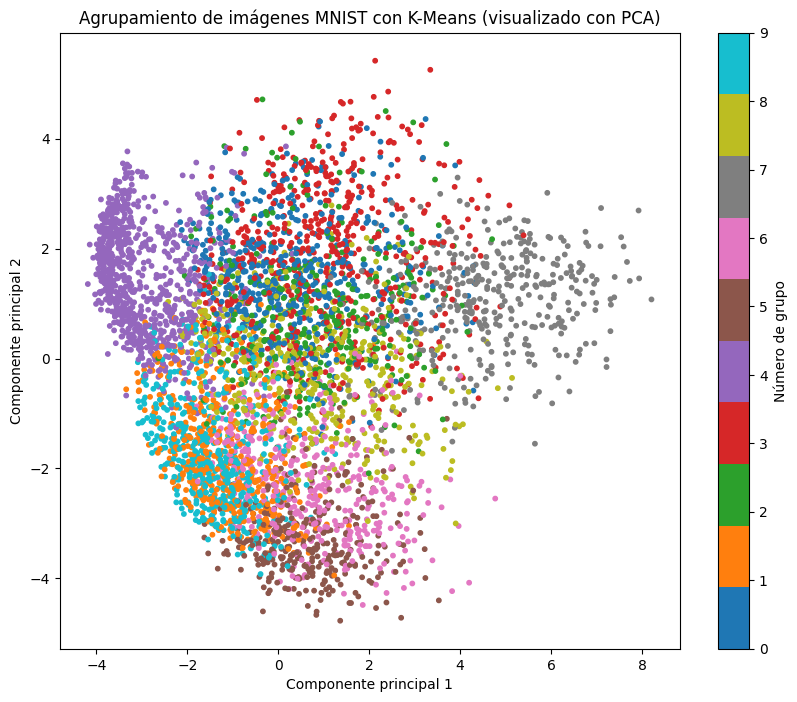


🔍 Coincidencia entre grupos y etiquetas reales: 0.37


In [7]:
# ============================================================
# 🧠 APRENDIZAJE NO SUPERVISADO CON IMÁGENES (FÁCIL DE ENTENDER)
# Ejemplo: Agrupamiento con K-Means y visualización con PCA
# Dataset: MNIST (dígitos escritos a mano)
# ============================================================

# 1️⃣ Importar librerías
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from tensorflow.keras.datasets import mnist

# 2️⃣ Cargar el dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Usamos solo una parte del dataset (para hacerlo más rápido)
x = x_train[:5000]
y = y_train[:5000]  # solo se usa al final para comparar, no para entrenar

print("Tamaño de las imágenes:", x.shape)

# 3️⃣ Preprocesamiento de imágenes
# Convertimos cada imagen 28x28 en un vector de 784 valores
x_flat = x.reshape(len(x), -1)

# Normalizamos los valores de píxeles entre 0 y 1
x_flat = x_flat / 255.0

# 4️⃣ Aplicar K-Means (agrupamiento no supervisado)
print("\n🔹 Entrenando modelo K-Means...")
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(x_flat)
labels = kmeans.labels_
print("✅ Modelo entrenado. Se formaron 10 grupos.")

# 5️⃣ Visualizar algunas imágenes de un grupo
def mostrar_grupo(grupo):
    indices = np.where(labels == grupo)[0]
    muestras = x[indices[:9]]  # tomamos 9 imágenes del grupo
    plt.figure(figsize=(5,5))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(muestras[i], cmap='gray')
        plt.axis('off')
    plt.suptitle(f"Ejemplos del Grupo {grupo}", fontsize=14)
    plt.show()

# Mostramos los primeros 3 grupos
for g in range(3):
    mostrar_grupo(g)

# 6️⃣ Reducir dimensiones con PCA para visualizar en 2D
print("\n🔹 Aplicando PCA para reducir dimensiones...")
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_flat)

# 7️⃣ Graficar los grupos encontrados por K-Means
plt.figure(figsize=(10, 8))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=labels, cmap='tab10', s=10)
plt.title("Agrupamiento de imágenes MNIST con K-Means (visualizado con PCA)")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.colorbar(label='Número de grupo')
plt.show()

# 8️⃣ (Opcional) Comparar los grupos con las etiquetas reales
from sklearn.metrics import adjusted_rand_score
score = adjusted_rand_score(y, labels)
print(f"\n🔍 Coincidencia entre grupos y etiquetas reales: {score:.2f}")
